# Module 3 : Performance measurements of Logistic regression and Linear regression algorithms

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
#Load given dataset
data = p.read_csv("Bitcoin.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=data.dropna()

In [5]:
df.head()

,Date,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD]
0,2014-01-02,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3
6,2014-01-08,790.00,61439.0,0.18,8,1225.3,1837.49,91.90,11089.3
12,2014-01-14,823.00,57378.0,0.22,8,1245.2,1838.88,92.15,11089.3
15,2014-01-17,817.15,59026.0,0.19,8,1251.7,1838.70,93.96,11089.3
21,2014-01-23,819.62,63576.0,0.19,8,1262.6,1828.46,97.23,11089.3


In [6]:
df.columns

Index(['Date', 'BTC price [USD]', 'n-transactions', 'fee [USD]',
       'btc search trends', 'Gold price[USD]', 'SP500 close index',
       'Oil WTI price[USD]', 'M2(Not seasonally adjusted)[1e+09 USD]'],
      dtype='object')

In [7]:
df.rename(columns={"BTC price [USD]":"BTC_price_USD"},inplace=True)
df.rename(columns={"n-transactions":"n_transactions"},inplace=True)
df.rename(columns={"fee [USD]":"fee_USD"},inplace=True)
df.rename(columns={"btc search trends":"btc_search_trends"},inplace=True)
df.rename(columns={"Gold price[USD]":"Gold_price_USD"},inplace=True)
df.rename(columns={"SP500 close index":"SP500_close_index"},inplace=True)
df.rename(columns={"Oil WTI price[USD]":"Oil_WTI_price_USD"},inplace=True)
df.rename(columns={"M2(Not seasonally adjusted)[1e+09 USD]":"M2_money_supply_USA"},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 2309
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1002 non-null   object 
 1   BTC_price_USD        1002 non-null   float64
 2   n_transactions       1002 non-null   float64
 3   fee_USD              1002 non-null   float64
 4   btc_search_trends    1002 non-null   int64  
 5   Gold_price_USD       1002 non-null   float64
 6   SP500_close_index    1002 non-null   float64
 7   Oil_WTI_price_USD    1002 non-null   float64
 8   M2_money_supply_USA  1002 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 78.3+ KB


In [9]:
del df['Date']



In [10]:
df.columns

Index(['BTC_price_USD', 'n_transactions', 'fee_USD', 'btc_search_trends',
       'Gold_price_USD', 'SP500_close_index', 'Oil_WTI_price_USD',
       'M2_money_supply_USA'],
      dtype='object')

In [11]:
df.head()

,BTC_price_USD,n_transactions,fee_USD,btc_search_trends,Gold_price_USD,SP500_close_index,Oil_WTI_price_USD,M2_money_supply_USA
0,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3
6,790.00,61439.0,0.18,8,1225.3,1837.49,91.90,11089.3
12,823.00,57378.0,0.22,8,1245.2,1838.88,92.15,11089.3
15,817.15,59026.0,0.19,8,1251.7,1838.70,93.96,11089.3
21,819.62,63576.0,0.19,8,1262.6,1828.46,97.23,11089.3


In [12]:
df.tail()

,BTC_price_USD,n_transactions,fee_USD,btc_search_trends,Gold_price_USD,SP500_close_index,Oil_WTI_price_USD,M2_money_supply_USA
2303,7130.99,329045.0,0.91,16,1745.4,2797.80,15.06,17269.8
2304,7477.60,320055.0,0.87,16,1735.6,2836.74,15.99,17269.8
2307,7699.27,311217.0,0.69,16,1723.8,2878.48,12.17,17269.8
2308,7790.66,323475.0,0.66,16,1722.2,2863.39,12.40,17269.8
2309,7765.33,331401.0,1.30,16,1713.4,2939.51,15.04,17269.8


In [13]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score,median_absolute_error

In [14]:
X = df.drop(labels='BTC_price_USD', axis=1)
#Response variable
y = df.loc[:,'BTC_price_USD']    

In [15]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression
linR= LinearRegression()
linR.fit(X_train,y_train)

predictL = linR.predict(X_test)

MAE= (mean_absolute_error(y_test,predictL))
print('MEAN ABSOLUTE ERROR VALUE IS :',MAE)
print(" ")

MSE=(mean_squared_error(y_test,predictL))
print('MEAN SQUARED ERROR VALUE IS :',MSE)
print(" ")

MedianAE=(median_absolute_error(y_test,predictL))
print('MEDIAN ABSOLUTE ERROR VALUE IS :',MedianAE)
print(" ")

EVS=(explained_variance_score(y_test,predictL)*100)
print('ACCURACY RESULT OF LINEAR REGRESSION IS :',EVS)
print(" ")

R2=(r2_score(y_test,predictL))
print('R2_SCORE VALUE IS :',R2)
print(" ")


MEAN ABSOLUTE ERROR VALUE IS : 1067.2353549011561
 
MEAN SQUARED ERROR VALUE IS : 1902495.778078313
 
MEDIAN ABSOLUTE ERROR VALUE IS : 918.413006370537
 
ACCURACY RESULT OF LINEAR REGRESSION IS : 87.15064247291966
 
R2_SCORE VALUE IS : 0.8707448052684265
 


# GradientBoostingRegressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor()
gb.fit(X_train,y_train)

predictgb = gb.predict(X_test)

MAE= (mean_absolute_error(y_test,predictgb))
print('MEAN ABSOLUTE ERROR VALUE IS :',MAE)
print(" ")

MSE=(mean_squared_error(y_test,predictgb))
print('MEAN SQUARED ERROR VALUE IS :',MSE)
print(" ")

MedianAE=(median_absolute_error(y_test,predictgb))
print('MEDIAN ABSOLUTE ERROR VALUE IS :',MedianAE)
print(" ")

EVS=(explained_variance_score(y_test,predictgb)*100)
print('ACCURACY RESULT OF GradientBoostingRegressor IS :',EVS)
print(" ")

R2=(r2_score(y_test,predictgb))
print('R2_SCORE VALUE IS :',R2)
print(" ")



MEAN ABSOLUTE ERROR VALUE IS : 373.78721511434054
 
MEAN SQUARED ERROR VALUE IS : 341418.86746489047
 
MEDIAN ABSOLUTE ERROR VALUE IS : 203.53474726439526
 
ACCURACY RESULT OF GradientBoostingRegressor IS : 97.69316837085633
 
R2_SCORE VALUE IS : 0.9768040682624889
 


Coefficients: 
 [-4.29804733e-03  1.00667769e+02  9.41760703e+01  4.37478207e+00
  5.78890903e+00  2.42708923e+01  3.40684207e-01]
Variance score: 0.8707448052684265


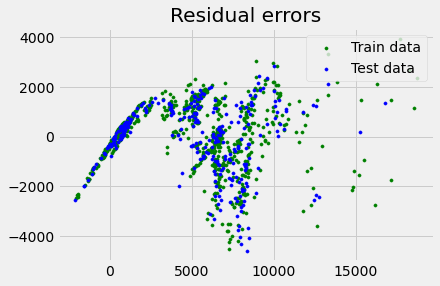

In [18]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
   color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
   color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()